# Data Analysis - Yelp data

I am going to use the csv file that I created in yelp_scraping.ipynb.

1. Read data
2. Clean up data
3. Analyze & Visualize data
4. Summary & Insights

In [1]:
# Import libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Read data

In [2]:
df = pd.read_csv('yelp.csv')
df.head()

,Name,Rating,Review_count,category,price_range,area
0,Smash Kitchen & Bar,4 star rating,762,Comfort Food,$$,Unionville
1,NextDoor Restaurant,4 star rating,475,Canadian (New),$$,Unionville Mainstreet
2,Alchemy Coffee,4 star rating,528,Coffee & Tea,$$,Unionville
3,Inspire Restaurant,4 star rating,494,Asian Fusion,$$,Unionville
4,Fat Ninja Bite,4.5 star rating,507,Japanese,$$,Milliken


In [3]:
# 240 rows & 6 columns
df.shape

(240, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          240 non-null    object
 1   Rating        240 non-null    object
 2   Review_count  240 non-null    int64 
 3   category      240 non-null    object
 4   price_range   226 non-null    object
 5   area          181 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


In [5]:
df.isna().sum()

Name             0
Rating           0
Review_count     0
category         0
price_range     14
area            59
dtype: int64

## 2. Clean up data

In [6]:
# Conver data type of Rating (ex: 4.5 star rating => 4.5)
df['Rating'] = df['Rating'].str.replace(' star rating',"")
df['Rating'] =  pd.to_numeric(df['Rating'])

In [7]:
# Check Unique value of Price range
df['price_range'].unique()

array(['$$', '$', '$$$', '$$$$', nan], dtype=object)

In [8]:
# Change Price range into Integer('$'=>1, '$$'=>2, '$$$'=>3)
price_level = []

for price in df['price_range']:
    if price == '$':
        price = 1
        price_level.append(price)
    elif price == '$$':
        price = 2
        price_level.append(price)
    elif price == '$$$':
        price = 3
        price_level.append(price)
    elif price is None:
        price = None
        price_level.append(price)
    else:
        price = 4
        price_level.append(price)

In [9]:
df['price_range'] = price_level

In [10]:
# Check data types
df.dtypes

Name             object
Rating          float64
Review_count      int64
category         object
price_range       int64
area             object
dtype: object

In [11]:
# There is one duplicated row
df[df.duplicated()]

,Name,Rating,Review_count,category,price_range,area
10,Toast Delight,4.0,209,Desserts,1,Unionville


In [12]:
# Remove the one duplicated row
df = df.drop(df.index[10])

## 3. Analyze & Visualize data

#### Distribution for Rating and Price range

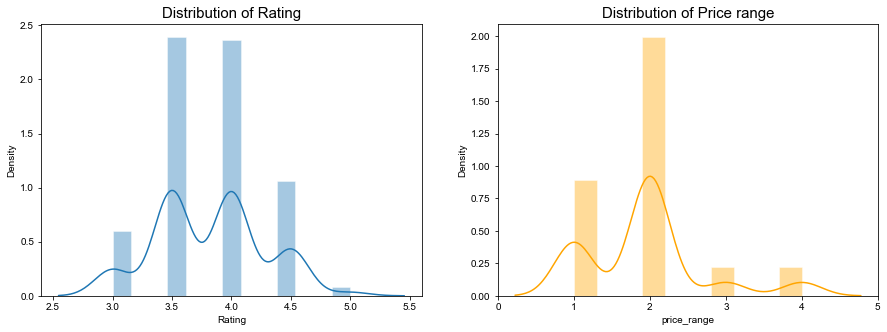

In [13]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.set_style('whitegrid')
sns.distplot(df['Rating'],ax=axes[0])
axes[0].set_title("Distribution of Rating",fontsize=15)

sns.distplot(df['price_range'],ax=axes[1],color='orange')
axes[1].set_title("Distribution of Price range",fontsize=15)

plt.show()

#### Top 10 high number of restaurant's categories

In [14]:
# Top 10 Category 
category_rank = pd.DataFrame(df['category'].value_counts()[:10])

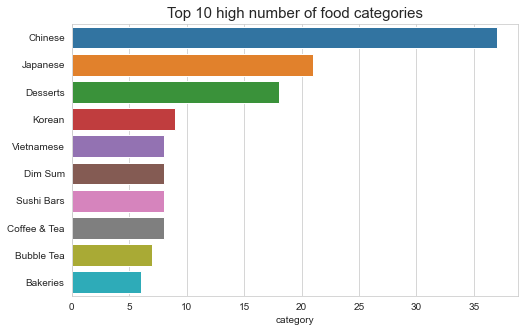

,category
Chinese,37
Japanese,21
Desserts,18
Korean,9
Vietnamese,8
Dim Sum,8
Sushi Bars,8
Coffee & Tea,8
Bubble Tea,7
Bakeries,6


In [15]:
# Plotting the result
plt.figure(figsize=(8,5))
sns.barplot(data = category_rank,x = category_rank['category'], y=category_rank.index)
plt.title("Top 10 high number of food categories", fontsize=15)
plt.show()
category_rank

#### Restaurant's Area Ratio

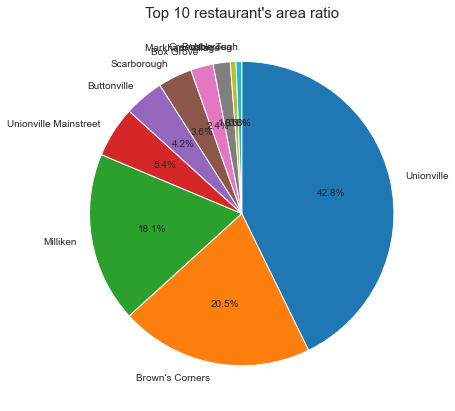

In [24]:
area_count = df.area.value_counts()[:10]
labels = area_count.keys()

plt.figure(figsize=(7,7))
plt.pie(x=area_count,autopct="%.1f%%", labels=labels,counterclock=False,startangle=90)
plt.title("Top 10 restaurant's area ratio", fontsize=15)
plt.show()

#### Relation ship between Rating vs. Review count and Price range

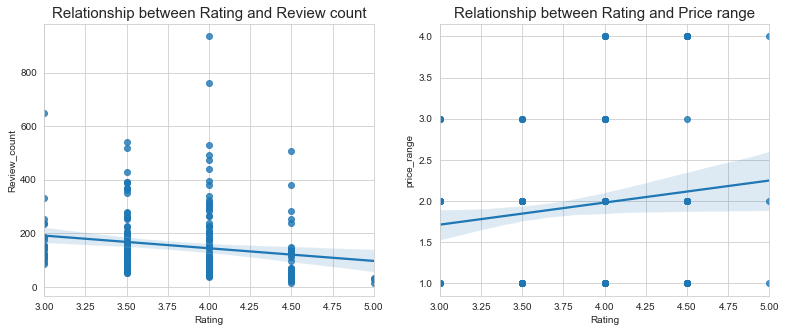

In [17]:
# Rating and Review count / Rating and price_range
fig, axes = plt.subplots(1,2,figsize=(13,5))
sns.regplot(data=df,x='Rating', y='Review_count',ax=axes[0])
axes[0].set_title('Relationship between Rating and Review count',fontsize=15)

sns.regplot(data=df,x='Rating', y='price_range',ax=axes[1])
axes[1].set_title('Relationship between Rating and Price range',fontsize=15)

plt.show()

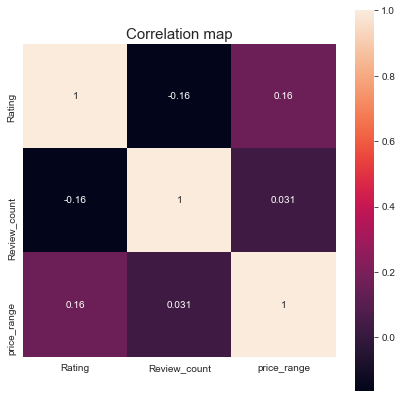

In [18]:
# Correlation heat map
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title("Correlation map",fontsize=15)
plt.show()

#### Review count by Area and Category

In [19]:
review_count_by_area = pd.DataFrame(df.groupby('area')['Review_count'].mean().sort_values(ascending=False)[:10])
review_count_by_category = pd.DataFrame(df.groupby('category')['Review_count'].mean().sort_values(ascending=False)[:10])

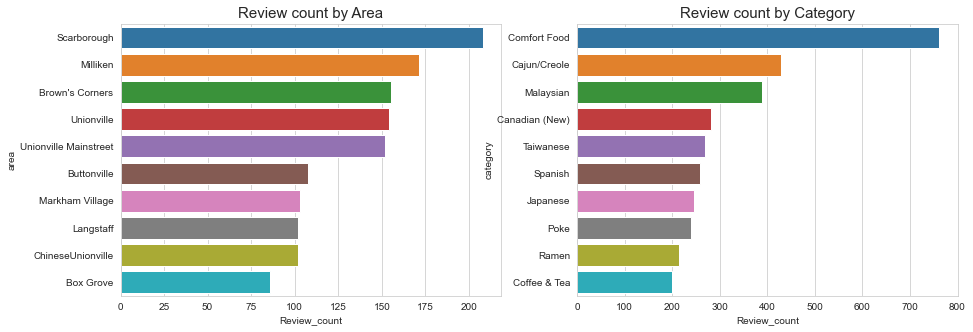

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=review_count_by_area, x='Review_count',y=review_count_by_area.index,ax=axes[0])
axes[0].set_title("Review count by Area",fontsize=15)

sns.barplot(data=review_count_by_category, x='Review_count',y=review_count_by_category.index,ax=axes[1])
axes[1].set_title("Review count by Category",fontsize=15)

plt.show()

# Summary & Insights

1. Rating is mostly between 3.5 to 4.0
2. Price range is almost 1 or 2. So, those restaurants are relatively cheap.
3. As we can see in the plot "Top 10 High number of food categories", most of the places are **Asian food** such as Chinese, Japanese, and Korean. <br>We can assume that there are more Asian people living aroung this area.
4. From the pie chart "Restaurant's area ratio", we can see that a lot of restaurant's are located in "Unionville".
5. Seems like there is no correlation between Rating and Review count, Rating and Price Range.
6. High review counts are focused on one specific restaurant.